In [2]:
!pip install pandas scikit-learn numpy joblib


In [3]:
!pip install tensorflow


In [4]:
!pip install xgboost


In [5]:
!pip install lightgbm


In [6]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [7]:
!pip install tensorflow



In [8]:
pip install pandas scikit-learn numpy joblib tensorflow xgboost lightgbm catboost


In [9]:
!pip install scikeras


In [10]:
from scikeras.wrappers import KerasRegressor



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 3370, number of used features: 10
[LightGBM] [Info] Start training from score 1136.750556


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


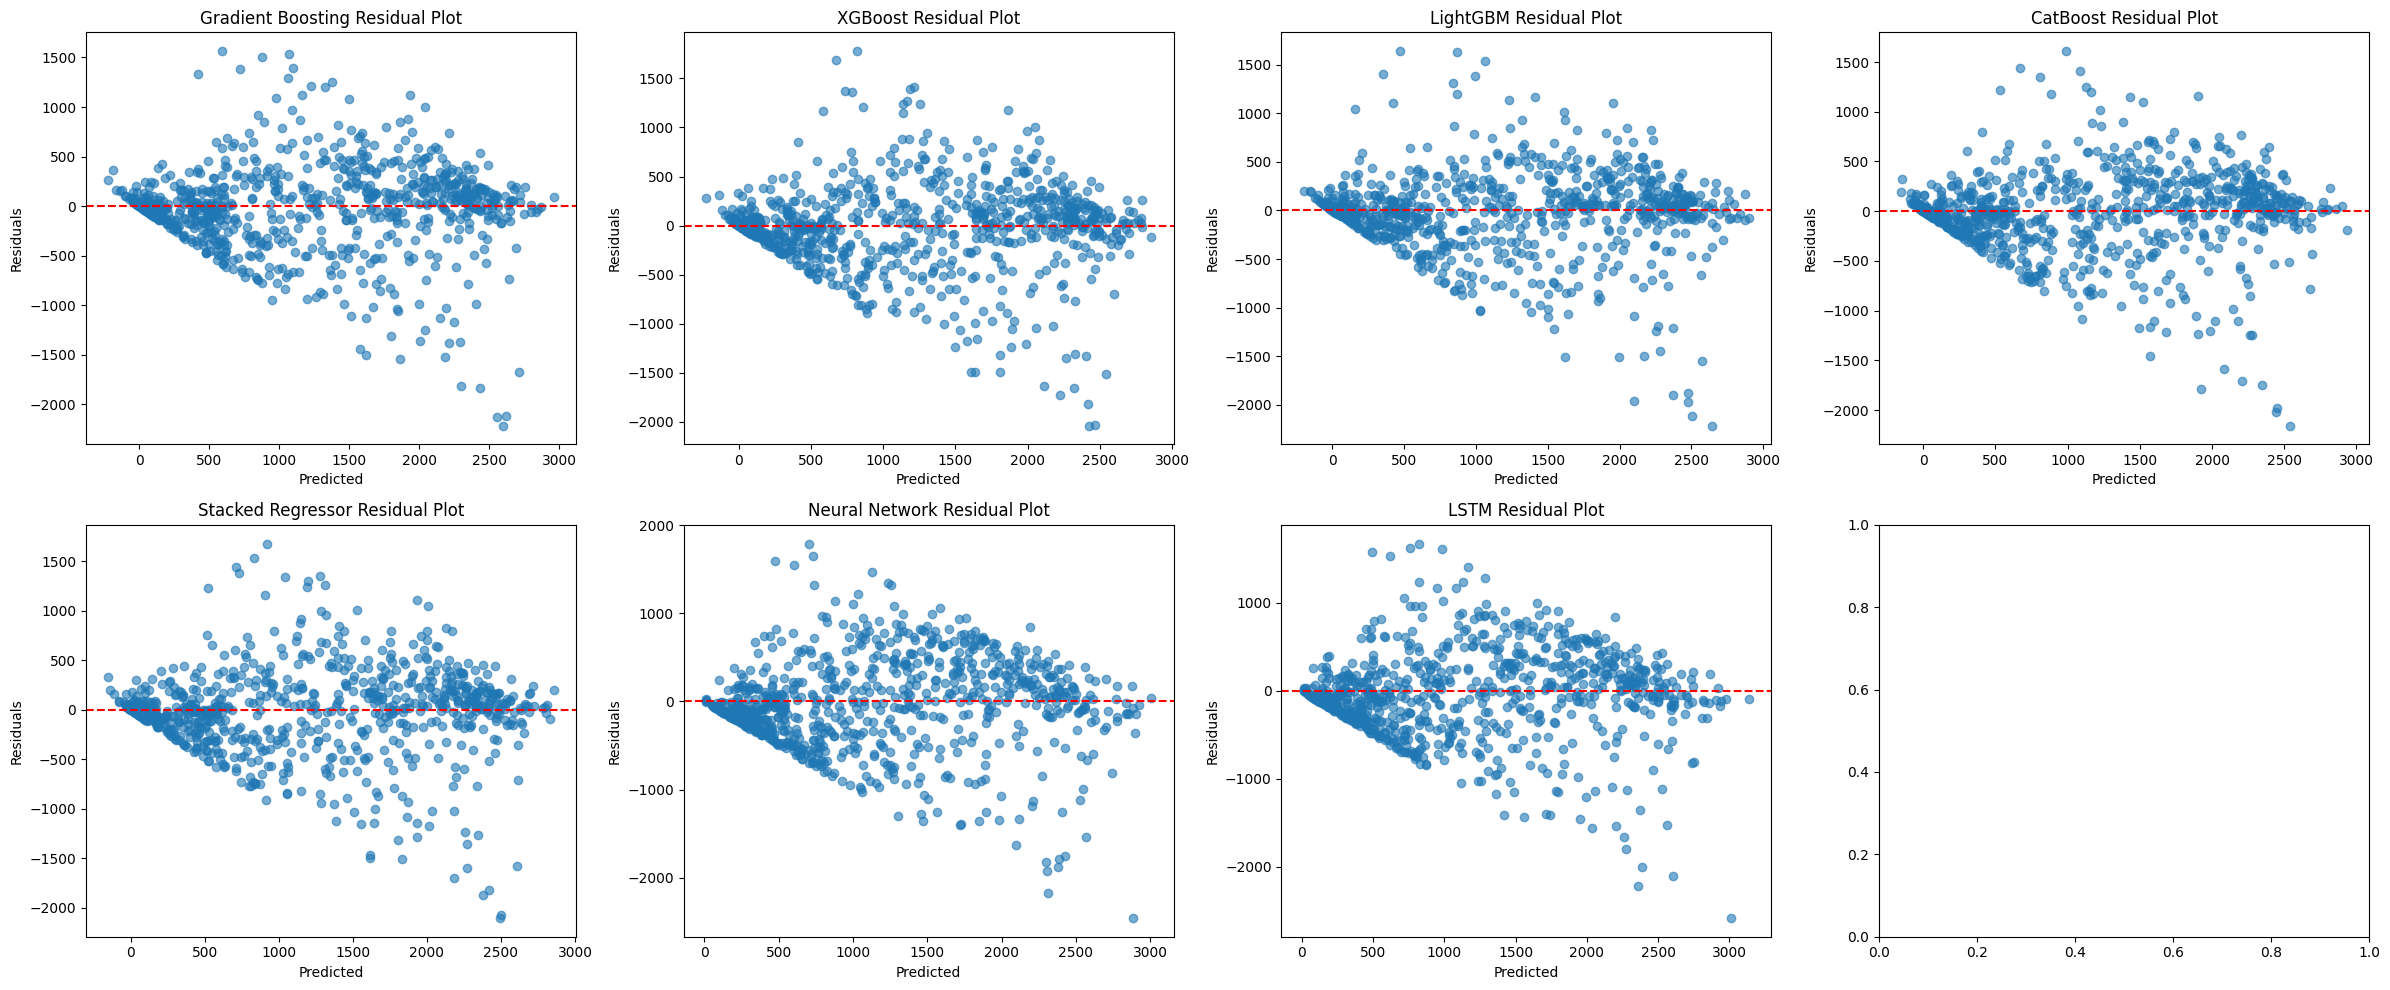

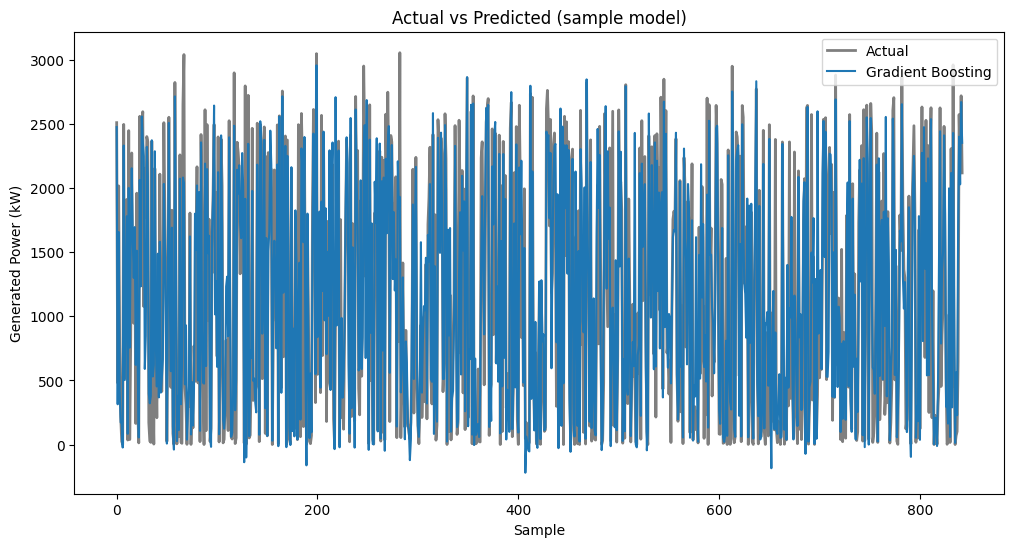

{'Gradient Boosting': {'y_pred': array([ 2.47649694e+03,  3.14204296e+02,  1.65807536e+03,  4.16752739e+02,
          1.73024002e+02,  1.69231547e+02, -2.32389699e+01,  2.33236940e+03,
          5.03015841e+02,  1.13371619e+03,  1.78084473e+03,  8.36737479e+01,
          2.00199053e+03,  7.56303306e+02,  1.59517995e+03,  2.15517014e+03,
          1.60567881e+03,  1.29990438e+03,  1.69644906e+03,  6.21498911e+02,
          1.51202549e+03,  5.91019958e+02,  5.55095551e+01,  2.06396914e+03,
          1.23400597e+03,  2.55895270e+03,  2.36574635e+03,  2.25097640e+03,
          5.89694456e+02,  8.46659918e+02,  2.32218365e+03,  2.09277826e+03,
          3.95398847e+02,  3.22056252e+02,  3.79223842e+02,  2.37339320e+03,
          5.31090619e+02,  6.21493768e+02,  2.28792590e+03,  7.84406353e+02,
          4.52884386e+02,  1.48885074e+03,  3.67736129e+02,  1.58166414e+03,
          4.05132799e+02,  5.21014540e+02,  6.64322409e+02,  2.03333515e+03,
          1.56178274e+03,  9.92119181e+02,  7

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
data = pd.read_csv("/content/Solar forecasting.csv")
data.fillna(data.mean(), inplace=True)

# Feature selection
X = data.drop(columns=['generated_power_kw'])
y = data['generated_power_kw']
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = data[selected_features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
models = {
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=-1, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, depth=8, random_seed=42, verbose=0),
}

# Stacked Regressor
base_models = [
    ('gbr', models['Gradient Boosting']),
    ('xgb', models['XGBoost']),
]
stack = StackingRegressor(estimators=base_models, final_estimator=Ridge())
models['Stacked Regressor'] = stack

# Evaluate all models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'y_pred': y_pred,
        'mse': mean_squared_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred)
    }

# Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
results['Neural Network'] = {
    'y_pred': y_pred_nn,
    'mse': mean_squared_error(y_test, y_pred_nn),
    'r2': r2_score(y_test, y_pred_nn),
    'mae': mean_absolute_error(y_test, y_pred_nn)
}

# LSTM model
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(25, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
results['LSTM'] = {
    'y_pred': y_pred_lstm,
    'mse': mean_squared_error(y_test, y_pred_lstm),
    'r2': r2_score(y_test, y_pred_lstm),
    'mae': mean_absolute_error(y_test, y_pred_lstm)
}

# Plot residuals and actual vs predicted
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))
axes = axes.flatten()

for i, (name, res) in enumerate(results.items()):
    residuals = y_test - res['y_pred']
    axes[i].scatter(res['y_pred'], residuals, alpha=0.6)
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_title(f"{name} Residual Plot")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Residuals")

plt.tight_layout()
plt.show()

# Plot predicted vs actual
fig, ax = plt.subplots(figsize=(12, 6))
for name, res in results.items():
    ax.plot(y_test.values, label='Actual', color='black', linewidth=2, alpha=0.5)
    ax.plot(res['y_pred'], label=name)
    break  # Only show one actual vs one model to avoid clutter

ax.set_title("Actual vs Predicted (sample model)")
ax.set_xlabel("Sample")
ax.set_ylabel("Generated Power (kW)")
ax.legend()
plt.show()

results


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 3370, number of used features: 10
[LightGBM] [Info] Start training from score 1136.750556


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 3370, number of used features: 10
[LightGBM] [Info] Start training from score 1136.750556


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1893
[LightGBM] [Info] Number of data points in the train set: 2696, number of used features: 10
[LightGBM] [Info] Start training from score 1134.216414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1892
[LightGBM] [Info] Number of data points in the train set: 2696, number of used features: 10
[LightGBM] [Info] Start training from score 1130.079455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1891
[LightGBM] [Info] Number of data points in the train set: 2696, number of used features: 10
[LightGBM] [Info] Start training from score 1127.970657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1889
[LightGBM] [Info] Number of data points in the train set: 2696, number of used features: 10
[LightGBM] [Info] Start training from score 1136.180866


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 2696, number of used features: 10
[LightGBM] [Info] Start training from score 1155.305389


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


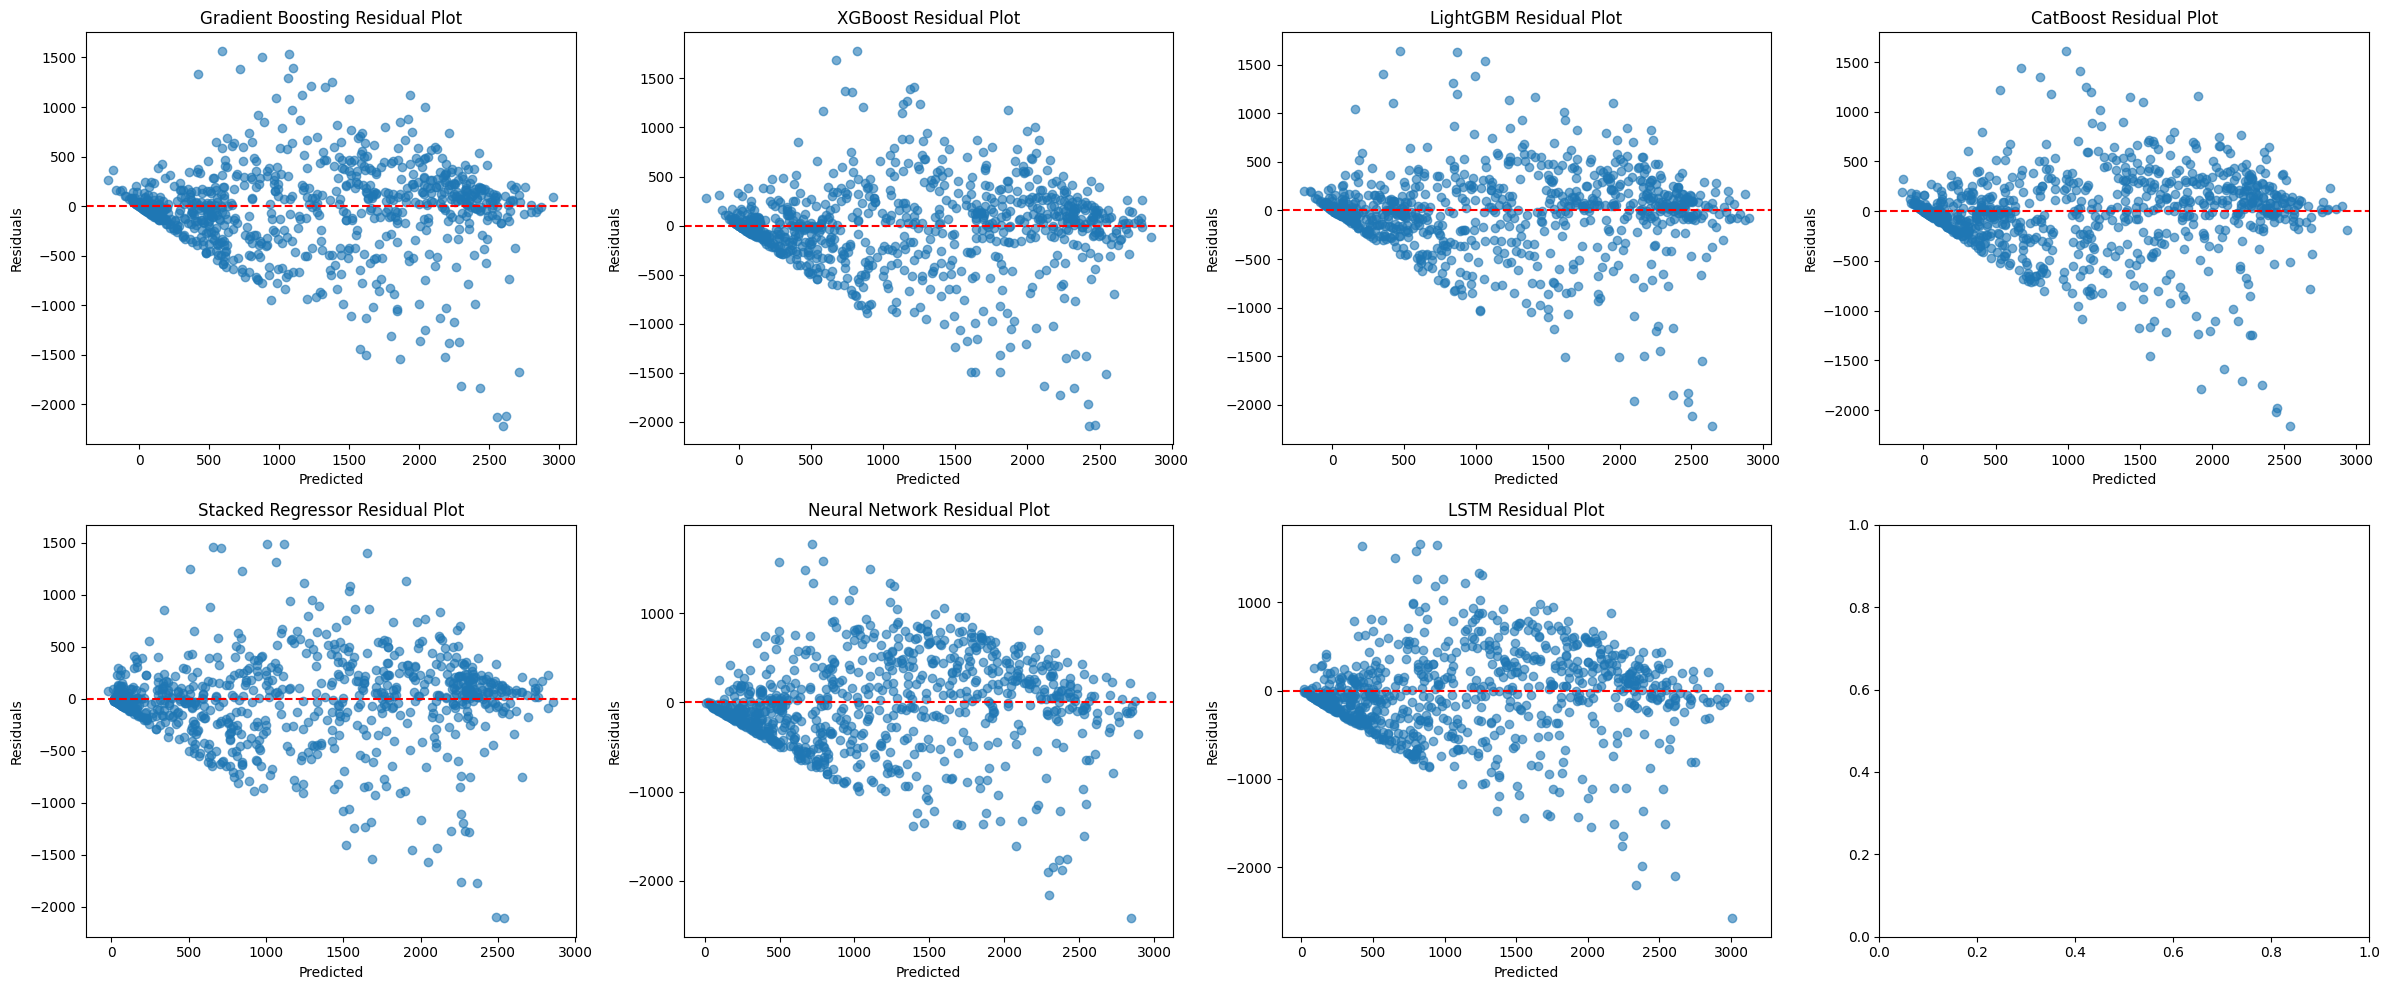

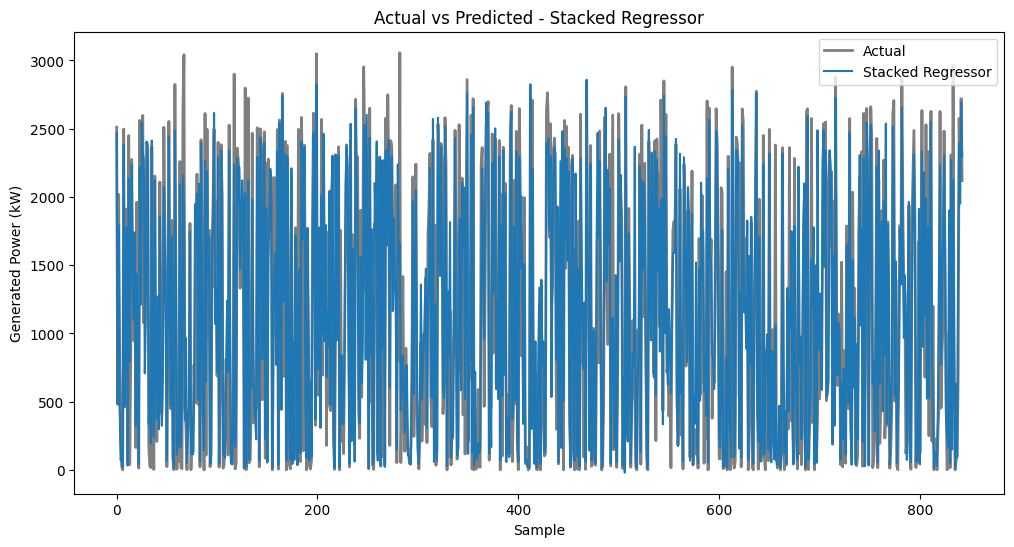


Model Performance Summary:
Gradient Boosting:
  Mean Squared Error (MSE): 191419.1386
  R² Score: 0.7904
  Mean Absolute Error (MAE): 289.8488

XGBoost:
  Mean Squared Error (MSE): 189704.3379
  R² Score: 0.7923
  Mean Absolute Error (MAE): 288.1906

LightGBM:
  Mean Squared Error (MSE): 178646.0946
  R² Score: 0.8044
  Mean Absolute Error (MAE): 272.6670

CatBoost:
  Mean Squared Error (MSE): 171419.5065
  R² Score: 0.8123
  Mean Absolute Error (MAE): 278.7915

Stacked Regressor:
  Mean Squared Error (MSE): 168414.6945
  R² Score: 0.8156
  Mean Absolute Error (MAE): 267.6911

Neural Network:
  Mean Squared Error (MSE): 268216.4861
  R² Score: 0.7064
  Mean Absolute Error (MAE): 386.1702

LSTM:
  Mean Squared Error (MSE): 246378.4534
  R² Score: 0.7303
  Mean Absolute Error (MAE): 360.1982



In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
data = pd.read_csv("/content/Solar forecasting.csv")
data.fillna(data.mean(), inplace=True)

# Feature selection
X = data.drop(columns=['generated_power_kw'])
y = data['generated_power_kw']
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = data[selected_features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define individual models
models = {
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=-1, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, depth=8, random_seed=42, verbose=0),
}

# Enhanced Stacked Regressor
base_models = [
    ('gbr', models['Gradient Boosting']),
    ('xgb', models['XGBoost']),
    ('lgb', models['LightGBM']),
    ('cat', models['CatBoost']),
]

meta_learner = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
stack = StackingRegressor(estimators=base_models, final_estimator=meta_learner, passthrough=True)
models['Stacked Regressor'] = stack

# Evaluate all models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'y_pred': y_pred,
        'mse': mean_squared_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred)
    }

# Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
results['Neural Network'] = {
    'y_pred': y_pred_nn,
    'mse': mean_squared_error(y_test, y_pred_nn),
    'r2': r2_score(y_test, y_pred_nn),
    'mae': mean_absolute_error(y_test, y_pred_nn)
}

# LSTM model
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(25, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
results['LSTM'] = {
    'y_pred': y_pred_lstm,
    'mse': mean_squared_error(y_test, y_pred_lstm),
    'r2': r2_score(y_test, y_pred_lstm),
    'mae': mean_absolute_error(y_test, y_pred_lstm)
}

# Plot residuals
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))
axes = axes.flatten()

for i, (name, res) in enumerate(results.items()):
    residuals = y_test - res['y_pred']
    axes[i].scatter(res['y_pred'], residuals, alpha=0.6)
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_title(f"{name} Residual Plot")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Residuals")

plt.tight_layout()
plt.show()

# Plot actual vs predicted for a selected model
fig, ax = plt.subplots(figsize=(12, 6))
sample_model = 'Stacked Regressor'
ax.plot(y_test.values, label='Actual', color='black', linewidth=2, alpha=0.5)
ax.plot(results[sample_model]['y_pred'], label=sample_model)
ax.set_title(f"Actual vs Predicted - {sample_model}")
ax.set_xlabel("Sample")
ax.set_ylabel("Generated Power (kW)")
ax.legend()
plt.show()

# Print performance metrics
print("\nModel Performance Summary:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {metrics['mse']:.4f}")
    print(f"  R² Score: {metrics['r2']:.4f}")
    print(f"  Mean Absolute Error (MAE): {metrics['mae']:.4f}\n")


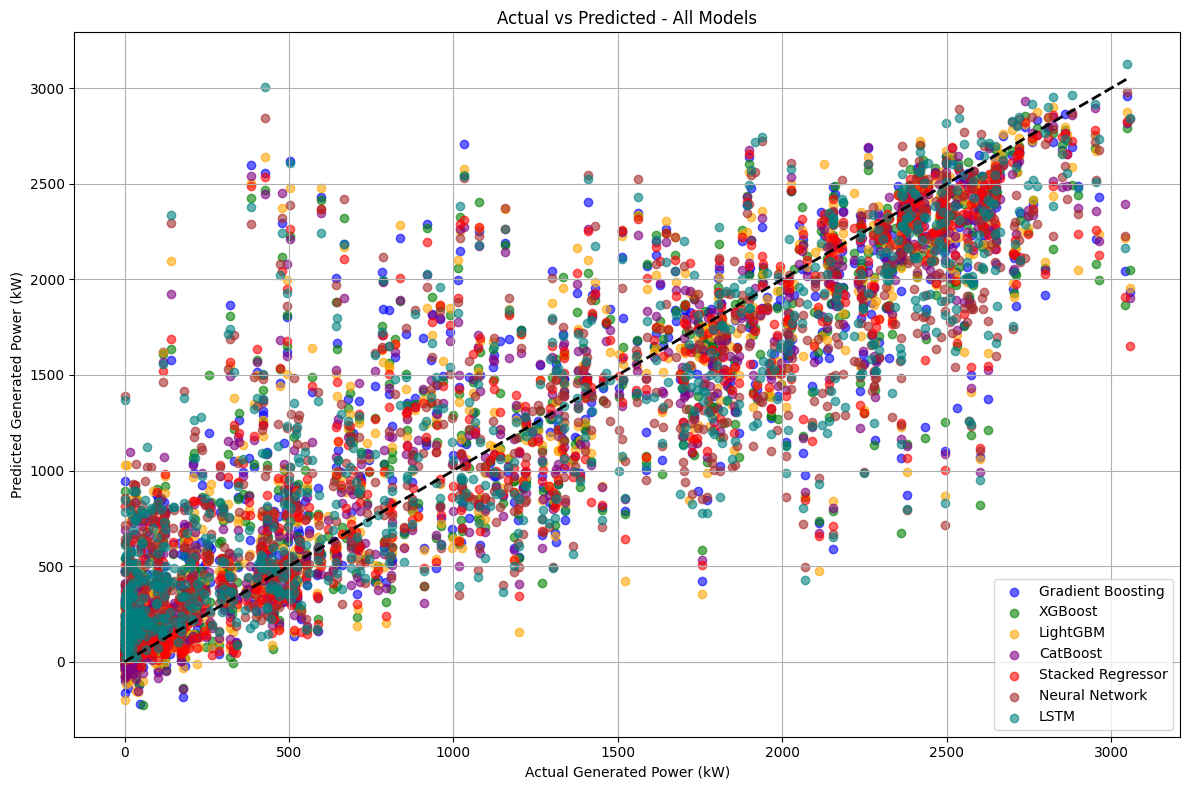

In [14]:
# Actual vs Predicted scatter plot for all models
plt.figure(figsize=(12, 8))

colors = {
    'Gradient Boosting': 'blue',
    'XGBoost': 'green',
    'LightGBM': 'orange',
    'CatBoost': 'purple',
    'Stacked Regressor': 'red',
    'Neural Network': 'brown',
    'LSTM': 'teal'
}

for name, res in results.items():
    plt.scatter(y_test, res['y_pred'], alpha=0.6, label=name, color=colors[name])

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Generated Power (kW)')
plt.ylabel('Predicted Generated Power (kW)')
plt.title('Actual vs Predicted - All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


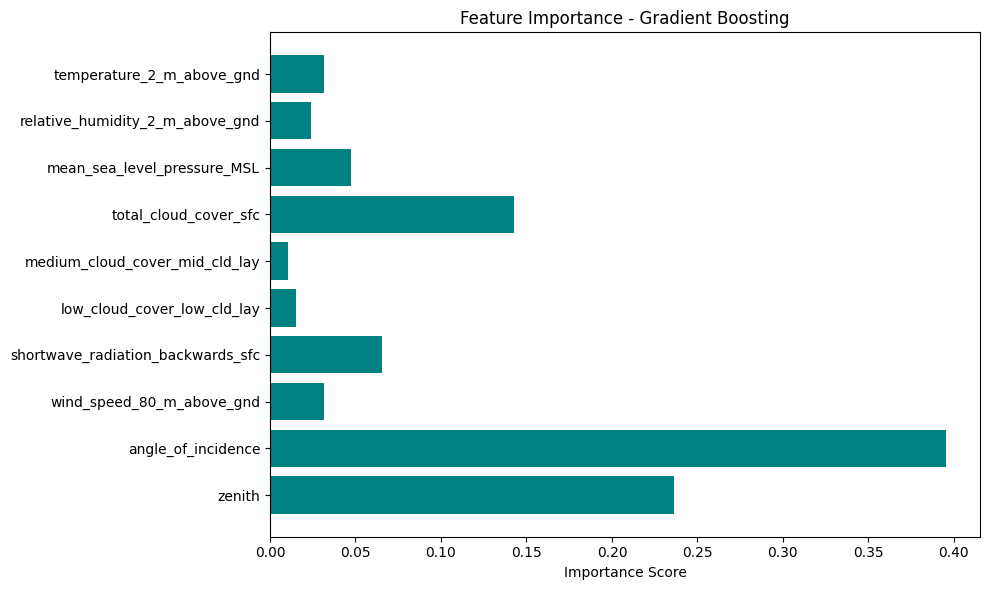

In [15]:
# Feature Importance Plot (using Gradient Boosting model as example)
importances = models['Gradient Boosting'].feature_importances_
feature_names = selected_features

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance - Gradient Boosting")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


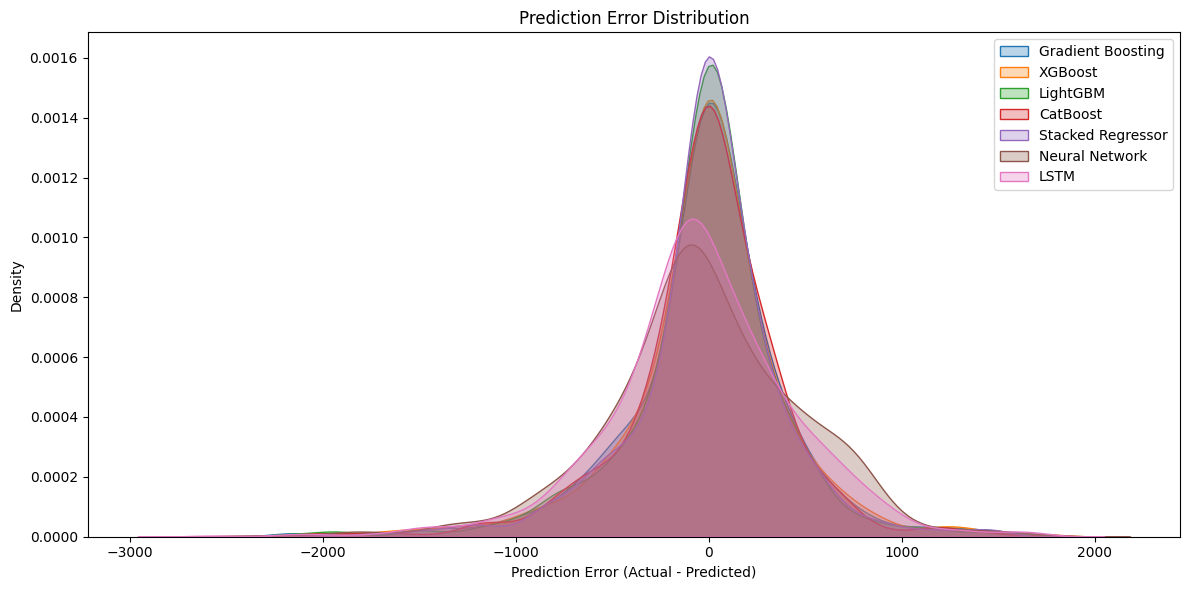

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for name, res in results.items():
    errors = y_test - res['y_pred']
    sns.kdeplot(errors, label=name, fill=True, alpha=0.3)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.legend()
plt.tight_layout()
plt.show()


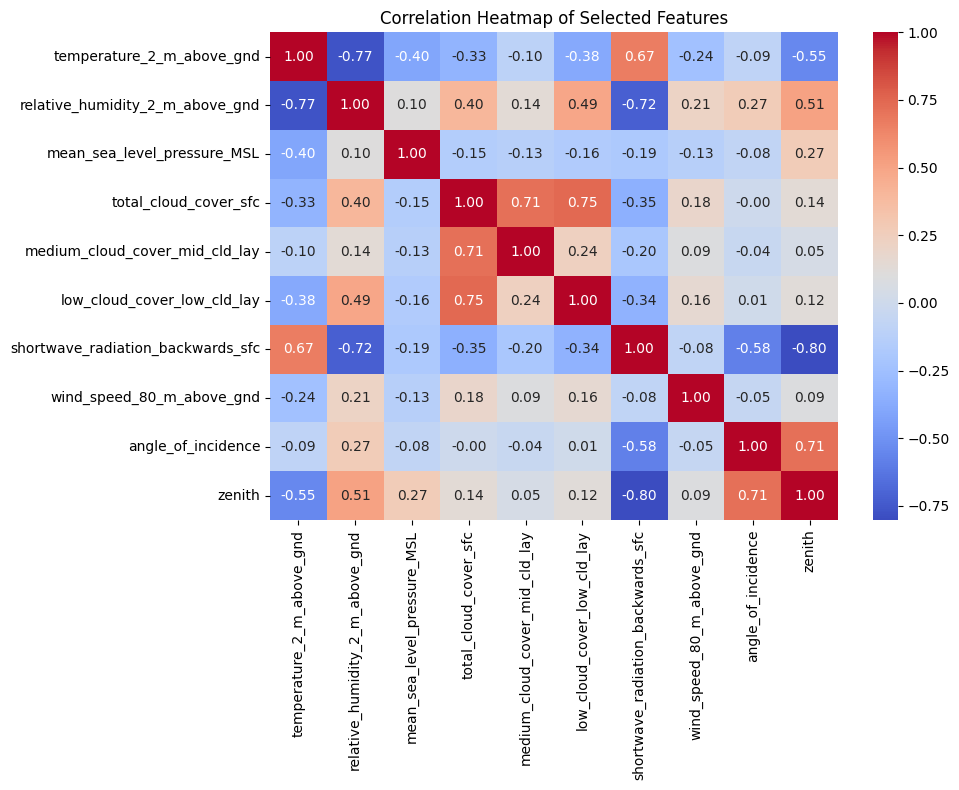

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()


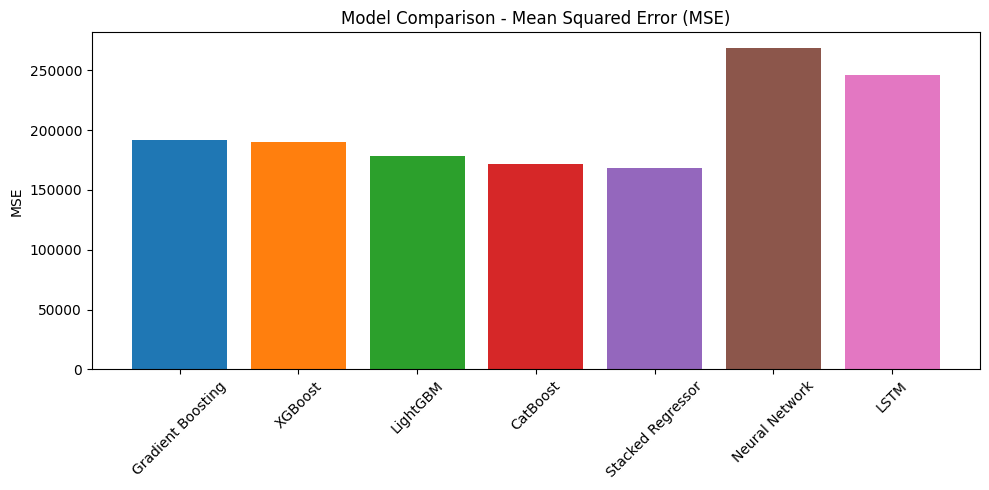

In [22]:
plt.figure(figsize=(10, 5))
colors = plt.cm.tab10.colors[:len(model_names)]
plt.bar(model_names, mse_vals, color=colors)
plt.xticks(rotation=45)
plt.ylabel("MSE")
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.tight_layout()
plt.show()


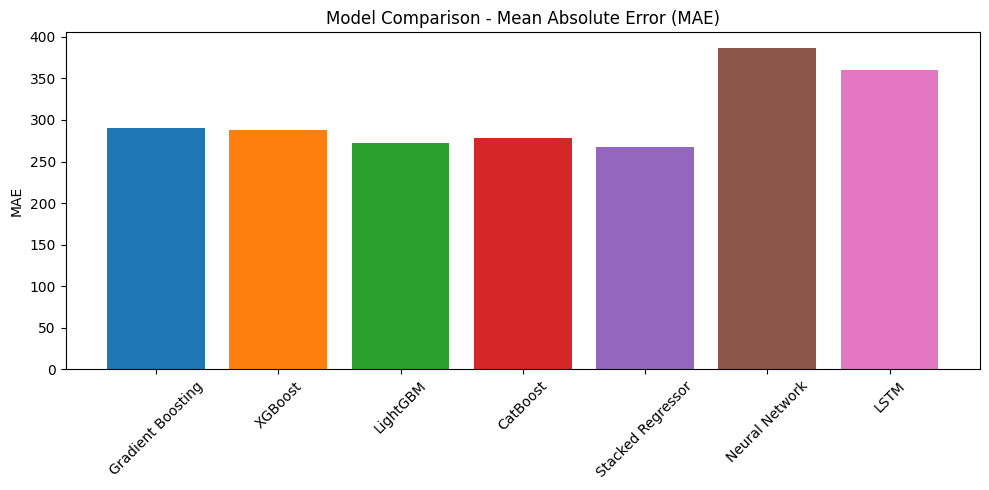

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_vals, color=colors)
plt.xticks(rotation=45)
plt.ylabel("MAE")
plt.title("Model Comparison - Mean Absolute Error (MAE)")
plt.tight_layout()
plt.show()


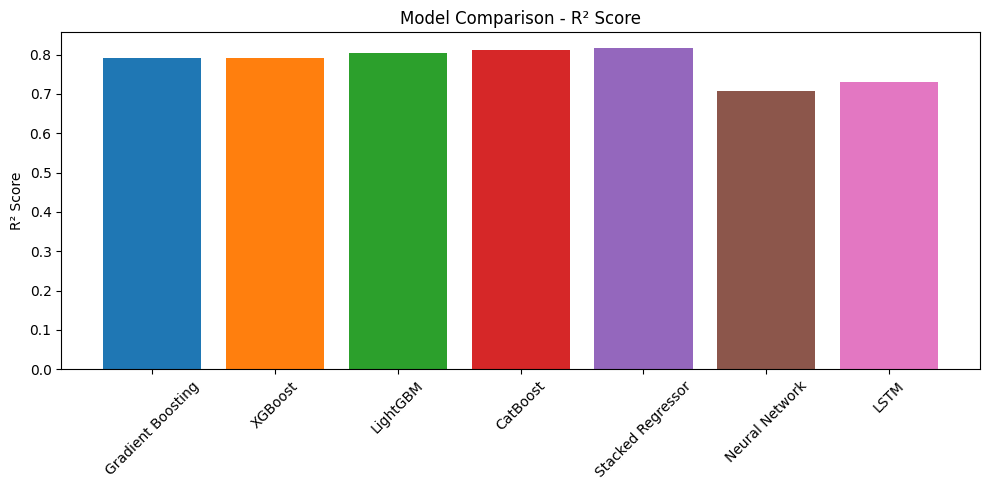

In [24]:
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_vals, color=colors)
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.tight_layout()
plt.show()
